In [2]:
# Dependences and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from scipy import stats

In [3]:
# Load the CSV file and display sample data
shopping_df = Path("shopping_trends_updated.csv")
shopping_df = pd.read_csv(shopping_df)
shopping_df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
#Add age groups to the DataFrame
shopping_df["Age Groups"] = pd.cut(
    x=shopping_df["Age"],
    bins =[1, 26, 42, 59, np.inf],
    labels=["Gen Z", "Millenials", "Gen X", "Baby Boomer"], 
)

shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Groups
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Gen X
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Gen Z
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Gen X
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Gen Z
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Millenials
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Gen X
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Gen X
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Gen X


In [5]:
# Reorganize the columns within the DataFrame
organized_df = shopping_df[["Customer ID", "Age", "Age Groups", "Gender", 
                            "Item Purchased", "Category", "Purchase Amount (USD)", 
                            "Location", "Size", "Color", "Season", "Review Rating", 
                            "Subscription Status", "Shipping Type", "Discount Applied", 
                            "Promo Code Used", "Previous Purchases", "Payment Method", 
                            "Frequency of Purchases"]]
organized_df.head()

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
gen_group_count = pd.DataFrame(organized_df.groupby("Age Groups")["Customer ID"].count())
gen_group_count

/var/folders/46/ts8y8d316y90ddxp6yyx4cb80000gn/T/ipykernel_95351/1805281516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gen_group_count = pd.DataFrame(organized_df.groupby("Age Groups")["Customer ID"].count())


,Customer ID
Age Groups,
Gen Z,640
Millenials,1200
Gen X,1272
Baby Boomer,788


Text(0, 0.5, 'Count')

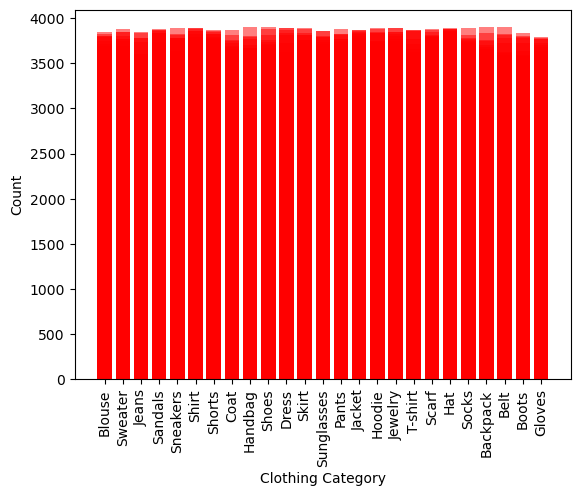

In [7]:
# What type of clothing is purchased most for each season? Fix the graph below!!
clothing = organized_df["Item Purchased"]
x_axis = np.arange(len(clothing))
plt.bar(clothing, x_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.xlabel("Clothing Category")
plt.ylabel("Count")

In [9]:
# Scatterplot with product rating and age group
# season = organized_df.loc[(organized_df["Season"]=="Spring")]
# season

In [10]:
x_axis

array([   0,    1,    2, ..., 3897, 3898, 3899])

In [12]:
organized_df["Age Groups"].value_counts()

Age Groups
Gen X          1272
Millenials     1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

In [14]:
organized_df["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [11]:
organized_df.groupby(["Age Groups"])["Gender"].value_counts()

/var/folders/46/ts8y8d316y90ddxp6yyx4cb80000gn/T/ipykernel_95351/1705233892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  organized_df.groupby(["Age Groups"])["Gender"].value_counts()


Age Groups   Gender
Gen Z        Male      442
             Female    198
Millenials   Male      822
             Female    378
Gen X        Male      846
             Female    426
Baby Boomer  Male      542
             Female    246
Name: count, dtype: int64

In [13]:
organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Male")].sample(n=198)

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1067,1068,18,Gen Z,Male,Dress,Clothing,43,Pennsylvania,S,Peach,Summer,2.7,No,2-Day Shipping,Yes,Yes,22,PayPal,Quarterly
1420,1421,22,Gen Z,Male,Jeans,Clothing,53,California,XL,Gray,Summer,4.6,No,Store Pickup,Yes,Yes,45,PayPal,Every 3 Months
2584,2585,26,Gen Z,Male,Socks,Clothing,30,Florida,L,Blue,Summer,2.9,No,Store Pickup,No,No,26,Bank Transfer,Bi-Weekly
1694,1695,20,Gen Z,Male,Shirt,Clothing,67,Mississippi,M,Turquoise,Summer,2.7,No,Express,No,No,20,Debit Card,Fortnightly
1293,1294,23,Gen Z,Male,Sweater,Clothing,74,Florida,XL,Yellow,Fall,4.1,No,Standard,Yes,Yes,30,Debit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,691,25,Gen Z,Male,Shorts,Clothing,68,Alaska,XL,Red,Spring,4.8,Yes,Standard,Yes,Yes,45,Bank Transfer,Weekly
718,719,22,Gen Z,Male,Shirt,Clothing,22,Florida,M,Peach,Summer,4.6,Yes,Standard,Yes,Yes,25,Bank Transfer,Annually
1357,1358,24,Gen Z,Male,Backpack,Accessories,66,Texas,S,Red,Summer,3.5,No,Next Day Air,Yes,Yes,20,Cash,Quarterly
8,9,26,Gen Z,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually


In [14]:
organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Female")].sample(n=198)

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3608,3609,24,Gen Z,Female,Gloves,Accessories,56,Tennessee,M,Cyan,Fall,4.3,No,Next Day Air,No,No,2,Cash,Every 3 Months
3005,3006,18,Gen Z,Female,Shorts,Clothing,65,Alaska,XL,Brown,Spring,3.5,No,Express,No,No,5,Venmo,Weekly
3690,3691,24,Gen Z,Female,Blouse,Clothing,23,Kansas,S,Violet,Fall,3.7,No,Store Pickup,No,No,4,Bank Transfer,Bi-Weekly
2730,2731,23,Gen Z,Female,Gloves,Accessories,32,Wisconsin,M,Teal,Winter,4.1,No,Store Pickup,No,No,37,Bank Transfer,Annually
3122,3123,23,Gen Z,Female,Socks,Clothing,45,Georgia,M,Pink,Fall,3.0,No,Express,No,No,34,Credit Card,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,3699,25,Gen Z,Female,Skirt,Clothing,54,California,XL,Maroon,Spring,4.0,No,2-Day Shipping,No,No,4,Venmo,Annually
3360,3361,22,Gen Z,Female,Jacket,Outerwear,81,Minnesota,M,Maroon,Spring,3.3,No,2-Day Shipping,No,No,47,Cash,Every 3 Months
3422,3423,19,Gen Z,Female,Coat,Outerwear,91,New York,L,Beige,Winter,3.2,No,Next Day Air,No,No,9,Venmo,Monthly
3307,3308,18,Gen Z,Female,Scarf,Accessories,36,Pennsylvania,S,Green,Winter,4.0,No,Store Pickup,No,No,1,Cash,Monthly
